In [1]:
#Basic packages for reading data
import pandas as pd
import numpy as np
#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Preprocessing
from sklearn.model_selection import train_test_split
#Machine learning algorithms
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#Packages for interpreting results
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
import pickle

Import data


In [2]:
url = 'https://assets.datacamp.com/production/repositories/1765/datasets/ae888d00f9b36dd7d50a4afbc112761e2db766d2/turnover.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Explore data

In [4]:
df.info() #checking for missing values, and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


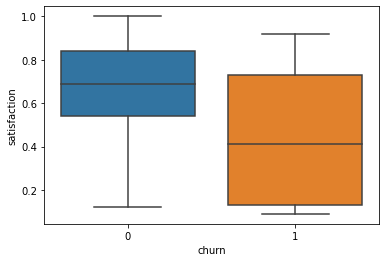

In [5]:
sns.boxplot(df.churn, df.satisfaction)
plt.show()

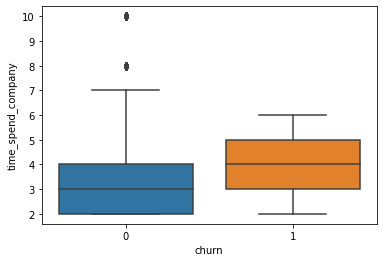

In [7]:
sns.boxplot(df.churn, df.time_spend_company)
plt.show()

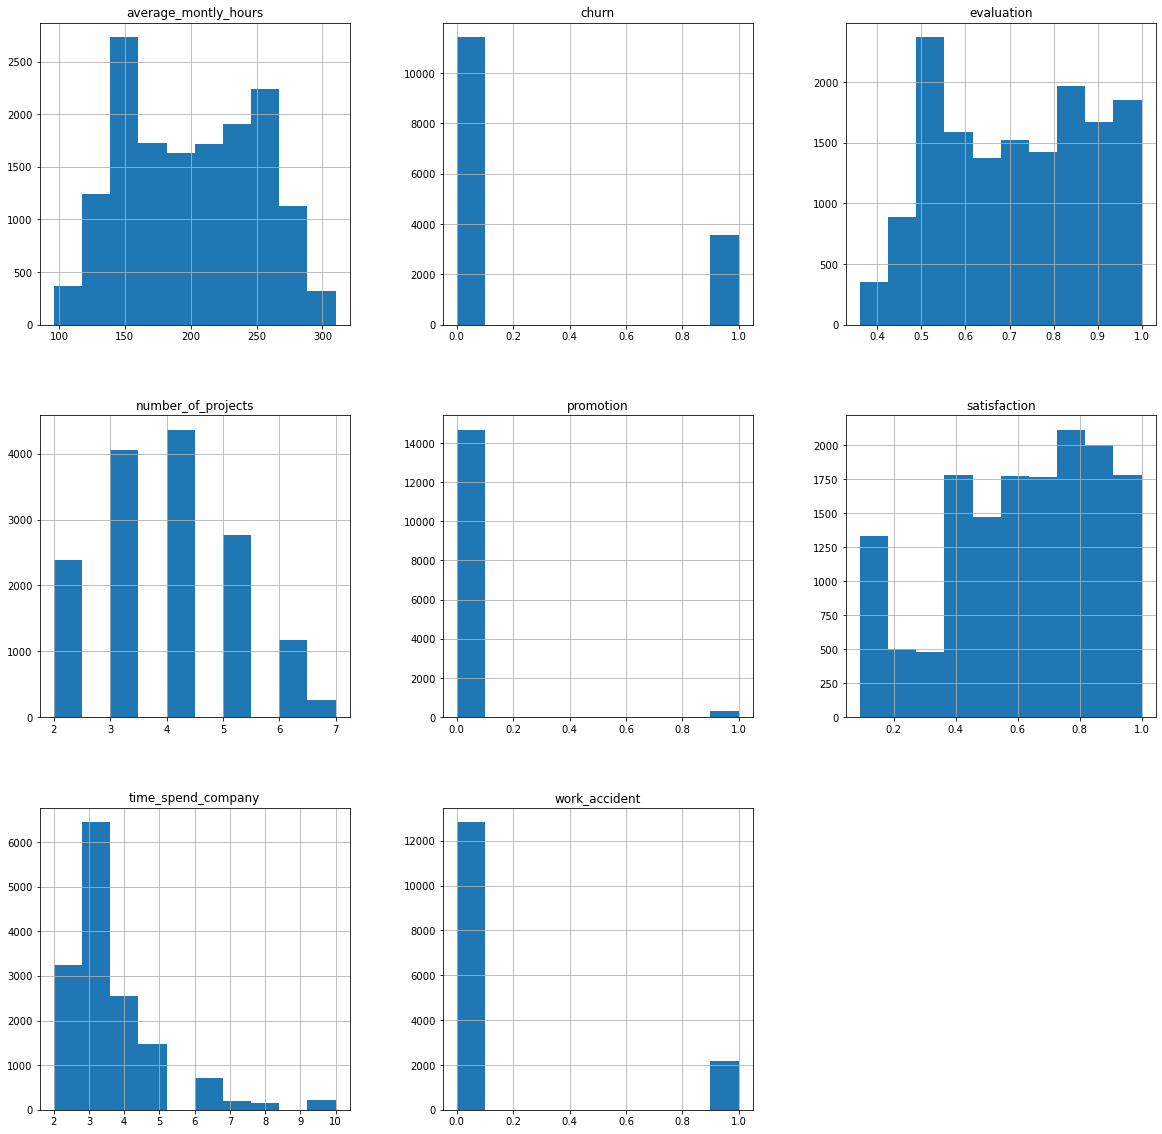

In [5]:
#Check the distrubutions, and central tendency of the data
df.hist(figsize=(20,20))
plt.show()

In [6]:
corr = df.corr()

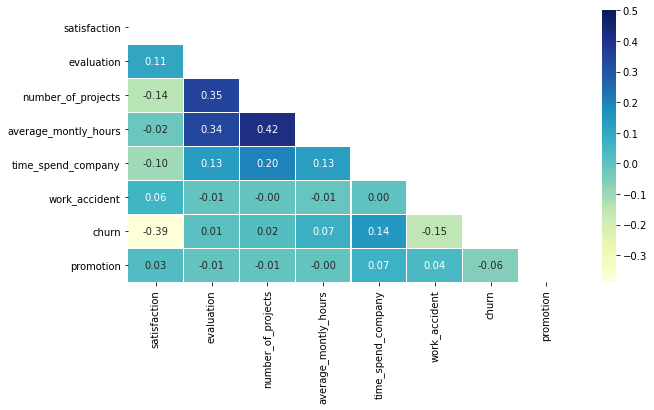

In [7]:
# Calculate correlations
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")
plt.show()

There are only a few contionus variables in the dataset, so it is normal that there are no colinearity amongst the features.

# Preprocessing for machine learning model

I am going to transform salary into categories. Since, they are ordinal caetgorical variables, I will reorder them. Also, I am going to transform the Departments into distinct categorical variables, by using dummy variables.

In [8]:
df['salary'] = df['salary'].astype('category')

df['salary'] = df['salary'].cat.reorder_categories(['low', 'medium', 'high'])

df['salary'] = df['salary'].cat.codes

In [9]:
departments = pd.get_dummies(df['department'], drop_first=True)
#join the new dataframe "departments" to employee dataset
df = df.join(departments)

In [10]:
df.drop('department', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   salary                14999 non-null  int8   
 9   RandD                 14999 non-null  uint8  
 10  accounting            14999 non-null  uint8  
 11  hr                    14999 non-null  uint8  
 12  management            14999 non-null  uint8  
 13  marketing             14999 non-null  uint8  
 14  product_mng           14999 non-null  uint8  
 15  sales              

Split data

In [11]:
#create X and y 
X = df.drop(['churn'], axis=1)
y = df.churn

In [12]:
#Split data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)

# Building Machine Learning Models

*Logistic* Regression

In [ ]:
X_train_const = sm.add_constant(X_train)
sm_model = sm.Logit(y_train, X_train_const).fit()
print(sm_model.summary())

Optimization terminated successfully.
         Current function value: 0.427169
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                10499
Model:                          Logit   Df Residuals:                    10481
Method:                           MLE   Df Model:                           17
Date:                Tue, 03 Nov 2020   Pseudo R-squ.:                  0.2216
Time:                        19:59:23   Log-Likelihood:                -4484.8
converged:                       True   LL-Null:                       -5761.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3141      0.170      1.846      0.065      -0.019       0.648

In [ ]:
df.churn.value_counts()

0    11428
1     3571
Name: churn, dtype: int64

In [ ]:
params = {'C': np.arange(1e-03, 2, 0.01)} 
log_grid_search = GridSearchCV(LogisticRegression(solver='liblinear', class_weight="balanced", random_state=7),
                                param_grid=params, scoring='recall', cv=5)
#fit the best logistic regression on data                      
log_grid = log_grid_search.fit(X_train, y_train)

In [ ]:
log_grid.score(X_train, y_train)

0.8151260504201681

In [ ]:
log_grid.score(X_test, y_test)

0.8190298507462687

In [ ]:
#Confusion matrix
confusion_matrix(y_test, log_grid.predict(X_test))

array([[2532,  896],
       [ 194,  878]])

In [ ]:
log_grid.fit(X_train, y_train)
print(classification_report(y_test, log_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      3428
           1       0.49      0.82      0.62      1072

    accuracy                           0.76      4500
   macro avg       0.71      0.78      0.72      4500
weighted avg       0.83      0.76      0.77      4500



In [ ]:
train_pred_probs = log_grid.predict_proba(X_train)
pred_probs = pd.Series(train_pred_probs[:, 1])
x, y, _ = roc_curve(y_train, pred_probs)
roc_auc = auc(x, y)

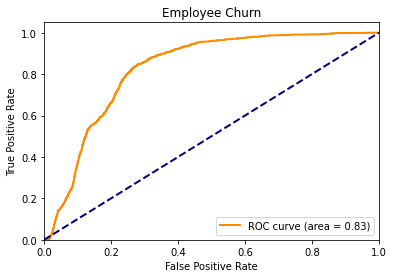

In [ ]:
plt.figure()
lw = 2
plt.plot(x, y, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Employee Churn')
plt.legend(loc="lower right")
plt.show()

Gradient Boosting

In [13]:
#Start with a grid search to find the best model
param = {'learning_rate': [0.3, 0.4, 0.5, 0.6, 0.7], 'max_depth': [5, 6, 7],
         'max_features': [None, 0.80, 0.90]} 

gbc = GradientBoostingClassifier(n_iter_no_change=10, n_estimators=300) 
model = GridSearchCV(gbc, param, cv=5, scoring='recall', n_jobs=2)
model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_estimators=300,
                                                  n_iter_no_change=10),
             n_jobs=2,
             param_grid={'learning_rate': [0.3, 0.4, 0.5, 0.6, 0.7],
                         'max_depth': [5, 6, 7],
                         'max_features': [None, 0.8, 0.9]},
             scoring='recall')

In [14]:
model.best_params_

{'learning_rate': 0.4, 'max_depth': 7, 'max_features': None}

In [15]:
model.best_estimator_.n_estimators_

25

In [16]:
print('train score: ', model.score(X_train, y_train))
print('test score: ', model.score(X_test, y_test))

train score:  0.9963985594237695
test score:  0.9533582089552238


In [17]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3428
           1       0.96      0.95      0.96      1072

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



In [18]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
x_cols = X_train.columns

pd.DataFrame({'columns': x_cols, 'importance scores':model.best_estimator_.feature_importances_}).sort_values(
    by='importance scores', ascending=False).head(5)

,columns,importance scores
0,satisfaction,0.479402
4,time_spend_company,0.167168
2,number_of_projects,0.130737
1,evaluation,0.118119
3,average_montly_hours,0.088149


In [ ]:
ttrain_pred_probs = model.predict_proba(X_test)
pred_probs = pd.Series(ttrain_pred_probs[:, 1])
x, y, _ = roc_curve(y_test, pred_probs)
roc_auc = auc(x, y)

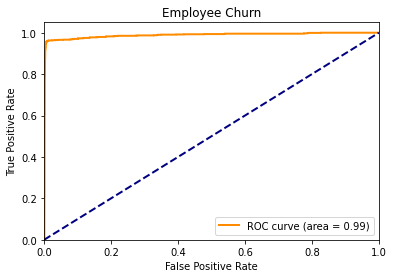

In [ ]:
plt.figure()
lw = 2
plt.plot(x, y, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Employee Churn')
plt.legend(loc="lower right")
plt.show()

This model has done the best job in predicting employee churn.

Support Vector Machines

Basic SVM

In [ ]:
svm = SVC(kernel='linear')

svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm.score(X_train, y_train)

0.7828364606152967

In [ ]:
svm.score(X_test, y_test)

0.7737777777777778

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
#Over all pretty bad recall for churned employees

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      3428
           1       0.56      0.25      0.34      1072

    accuracy                           0.77      4500
   macro avg       0.68      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



Tuning the C for linear kernel

In [ ]:
C_list = [0.01, 0.1, 1, 10, 100]
for C in C_list:
  svc = SVC(kernel='linear', C=C).fit(X_train, y_train)
  print(f'Train score for C = {C}: {svc.score(X_train, y_train):.2f}')
  print(f'Test score for C = {C}: {svc.score(X_test, y_test):.2f}\n')

Train score for C = 0.01: 0.76
Test score for C = 0.01: 0.76

Train score for C = 0.1: 0.79
Test score for C = 0.1: 0.78

Train score for C = 1: 0.78
Test score for C = 1: 0.77

Train score for C = 10: 0.80
Test score for C = 10: 0.80

Train score for C = 100: 0.80
Test score for C = 100: 0.79



In [ ]:
best_svm = SVC(C=10, kernel='linear')

best_svm.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(best_svm.score(X_train, y_train))
print(best_svm.score(X_test, y_test))

#results are better now, but they still need to be improved

0.8037908372225926
0.8


Conduct Grid search for rbf kernel

In [ ]:
param = {'C': [0.01, 0.1, 1, 10, 100], 'class_weight': [None, 'balanced'],
         'gamma': ['scale', 'auto']} 
         
rbf = SVC(kernel='rbf')

rbf_svm = GridSearchCV(rbf, param, cv=10, scoring='recall', n_jobs=2)
rbf_svm.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 'auto']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [ ]:
rbf_svm.best_params_

{'C': 10, 'class_weight': 'balanced', 'gamma': 'auto'}

In [ ]:
print(rbf_svm.score(X_train, y_train))
print(rbf_svm.score(X_test, y_test))

0.9859943977591037
0.9496268656716418


In [ ]:
y_pred = rbf_svm.predict(X_test)

In [ ]:
confusion_matrix(y_test, rbf_svm.predict(X_test))

array([[3268,  160],
       [  54, 1018]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3428
           1       0.86      0.95      0.90      1072

    accuracy                           0.95      4500
   macro avg       0.92      0.95      0.94      4500
weighted avg       0.96      0.95      0.95      4500



Less overfitting than Gradient Boosting, but still performs slightly worse over all.

Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, verbose=0,
                       warm_start=False)
rf = rf_model.fit(X_train, y_train)

In [ ]:
rf.score(X_train, y_train)

0.9755214782360225

In [ ]:
rf.score(X_test, y_test)

0.9666666666666667

In [ ]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3428
           1       0.95      0.91      0.93      1072

    accuracy                           0.97      4500
   macro avg       0.96      0.95      0.95      4500
weighted avg       0.97      0.97      0.97      4500



In terms of recall predictions, gradient boosting is superior to all other machine learning models.